In [18]:
import causalimpact
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [37]:
# Set the random seed for reproducibility
np.random.seed(42)

# Parameters
n_points = 200  # total number of points
change_point = int(0.7 * n_points)  # point of intervention
slope_pre = 0.5  # slope before intervention
slope_post = 0.5  # slope after intervention
intercept_pre = 5  # intercept before intervention
jump_at_intervention = 5  # sudden jump at the intervention point
noise_level = 2.0  # noise level in the data

# Seasonal parameters
seasonality_period = 12  # typical monthly seasonality
seasonal_amplitude = 3  # amplitude of the seasonal component

# Time periods
time = np.arange(n_points)

# Generating the seasonal component
seasonal_component = seasonal_amplitude * np.sin(2 * np.pi * time / seasonality_period)

# Generating the data
data_pre = (slope_pre * time[:change_point] + intercept_pre + seasonal_component[:change_point] +
            np.random.normal(scale=noise_level, size=change_point))
data_post = (slope_post * time[change_point:] + intercept_pre + jump_at_intervention + 
             seasonal_component[change_point:] + np.random.normal(scale=noise_level, size=n_points - change_point))

# Concatenating the pre and post intervention data
data = np.concatenate([data_pre, data_post])

# Generating the control data without the intervention jump
control_data_pre = slope_pre * time[:change_point] + intercept_pre + seasonal_component[:change_point] + np.random.normal(scale=noise_level, size=change_point)
control_data_post = slope_post * time[change_point:] + intercept_pre + seasonal_component[change_point:] + np.random.normal(scale=noise_level, size=n_points - change_point)

# Concatenating the pre and post control data
control_data = np.concatenate([control_data_pre, control_data_post])

# Creating a pandas DataFrame
ts_data = pd.DataFrame(data, columns=['Value'])
ts_data['Time'] = pd.date_range(start='2021-01-01', periods=n_points, freq='D')
ts_data['Control_Value'] = control_data

ts_data.head(), ts_data.tail(), change_point

(       Value       Time  Control_Value
 0   5.993428 2021-01-01       5.715575
 1   6.723471 2021-01-02       8.121569
 2   9.893453 2021-01-03      10.764179
 3  12.546060 2021-01-04      11.607604
 4   9.129769 2021-01-05       6.842737,
           Value       Time  Control_Value
 195  111.270635 2021-07-15     104.561649
 196  108.830361 2021-07-16     102.171807
 197  110.307450 2021-07-17     107.707745
 198  109.116417 2021-07-18     103.770920
 199  105.714059 2021-07-19     105.475633,
 140)

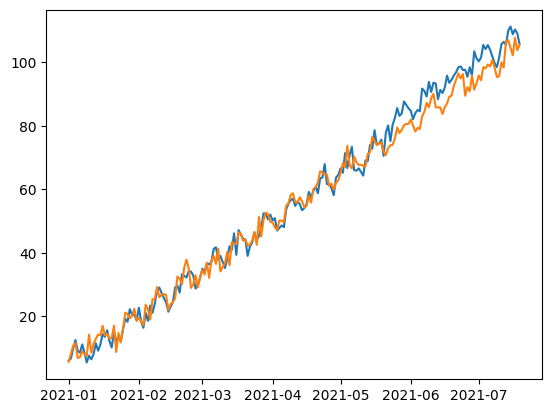

In [40]:
plt.plot(ts_data["Time"], ts_data["Value"])
plt.plot(ts_data["Time"], ts_data["Control_Value"])
plt.show()

In [31]:
df = ts_data.rename(columns={"Value": "y", "Control_Value": "X"}).set_index("Time")
c = causalimpact.CausalImpact(df, pre_period=["20210101", "20210521"], post_period=["20210522", "20210719"])

/Users/julienperichon/.pyenv/versions/3.11.6/envs/causal-impact-meetup/lib/python3.11/site-packages/causalimpact/data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():


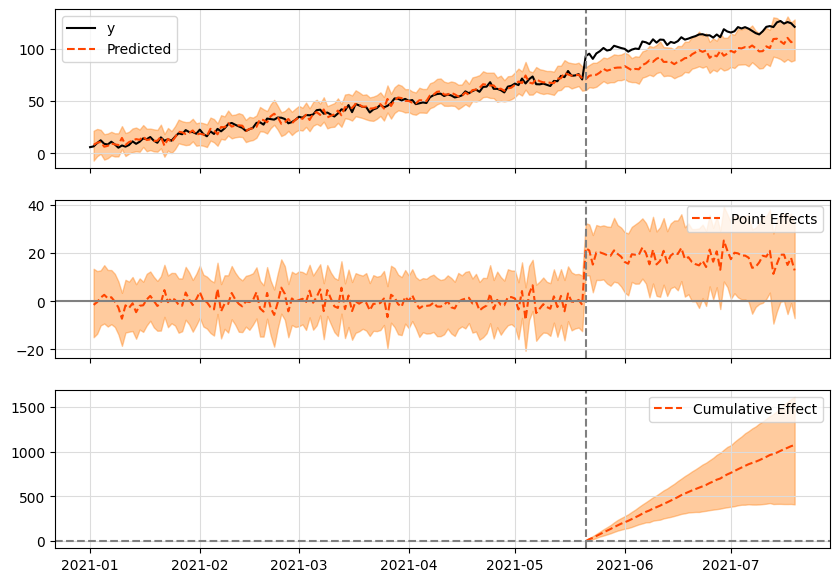

In [32]:
c.plot()

In [41]:
df = ts_data.rename(columns={"Value": "y", "Control_Value": "X"}).set_index("Time")
c = causalimpact.CausalImpact(df, pre_period=["20210101", "20210521"], post_period=["20210522", "20210719"])

/Users/julienperichon/.pyenv/versions/3.11.6/envs/causal-impact-meetup/lib/python3.11/site-packages/causalimpact/data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():


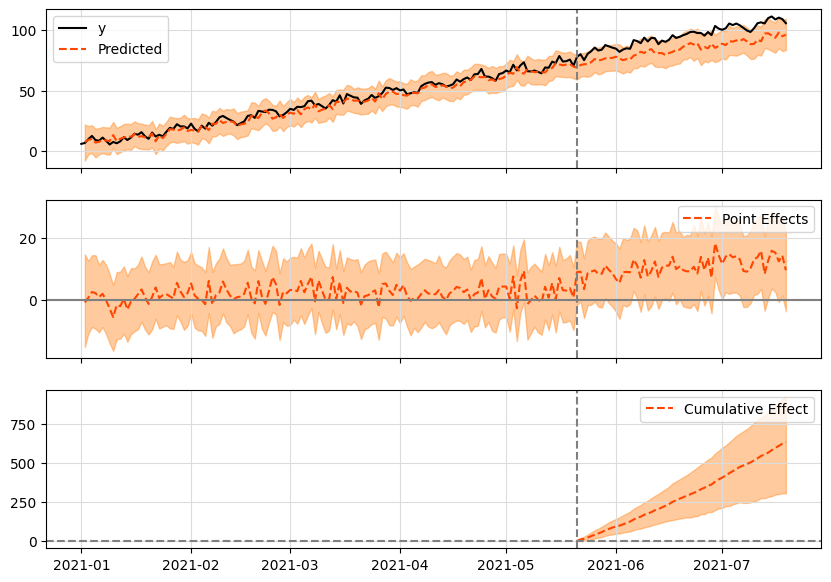

In [42]:
c.plot()

In [43]:
print(c.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    95.16              5614.36
Prediction (s.d.)         84.44 (2.81)       4982.12 (165.57)
95% CI                    [79.6, 90.6]       [4696.44, 5345.46]

Absolute effect (s.d.)    10.72 (2.81)       632.25 (165.57)
95% CI                    [4.56, 15.56]      [268.9, 917.92]

Relative effect (s.d.)    12.69% (3.32%)     12.69% (3.32%)
95% CI                    [5.4%, 18.42%]     [5.4%, 18.42%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [ ]:
df = ts_data.rename(columns={"Value": "y", "Control_Value": "X"}).set_index("Time")
c = causalimpact.CausalImpact(df, pre_period=["20210101", "20210521"], post_period=["20210522", "20210719"], model_args={'fit_method': 'hmc'})

/Users/julienperichon/.pyenv/versions/3.11.6/envs/causal-impact-meetup/lib/python3.11/site-packages/causalimpact/data.py:263: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/Users/julienperichon/.pyenv/versions/3.11.6/envs/causal-impact-meetup/lib/python3.11/site-packages/tensorflow_probability/python/mcmc/sample.py:339: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn('Tracing all kernel results by default is deprecated. Set '


In [ ]:
c.plot()

In [ ]:
print(c.summary())